In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns              
# Python Geospatial Data Library
import geopandas as gpd            
plt.style.use('fivethirtyeight')


file =pd.read_csv("Resources/CleanAirbnbData.csv")
abb_df = pd.DataFrame(file)
# read data
abb_df.head()

,ID,Name,Host ID,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
print(max(abb_df['Calculated Host Listings Count']))

327


In [6]:
# Check null value
abb_df.isnull().sum()

ID                                   0
Name                                 4
Host ID                              0
Host Name                            8
Neighbourhood Group                  0
Neighbourhood                        0
Latitude                             0
Longitude                            0
Room Type                            0
Price                                0
Minimum Nights                       0
Number of Reviews                    0
Last Review                       5207
Reviews per Month                 5207
Calculated Host Listings Count       0
Availability                         0
dtype: int64

In [7]:
# summary of dataset
abb_df.describe()

,ID,Host ID,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Calculated Host Listings Count,Availability
count,3.136200e+04,3.136200e+04,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,26155.000000,31362.000000,31362.000000
mean,2.100481e+07,8.144950e+07,40.728401,-73.948745,162.050475,8.338658,31.852369,1.810126,10.334067,175.831994
std,1.148631e+07,8.673088e+07,0.056561,0.051397,254.425463,23.836703,51.636804,1.805707,40.700398,126.187636
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000
25%,1.167514e+07,8.620116e+06,40.688383,-73.983270,70.000000,2.000000,2.000000,0.450000,1.000000,55.000000
50%,2.254548e+07,4.109561e+07,40.723720,-73.954110,111.500000,3.000000,10.000000,1.230000,1.000000,168.000000
75%,3.119407e+07,1.452145e+08,40.763030,-73.930133,189.000000,5.000000,39.000000,2.680000,3.000000,305.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Cleaning up data.
# abb_df.drop(['latitude'],axis=1, inplace=True)
# abb_df.drop(['longitude'], axis=1, inplace=True)
# abb_df.drop(['last_review'],axis=1, inplace=True)
# abb_df.drop(['availability_365'],axis=1, inplace=True)
# abb_df

In [6]:
# Host summary

In [8]:
host_count = len(abb_df['Host ID'].unique())
id_count = len(abb_df['ID'].unique())
host=pd.DataFrame({"Host Count":[host_count],"List ID count":[id_count]})
host

,Host Count,List ID count
0,21809,31362


In [8]:
mutiple_list_count=abb_df['Host ID'].value_counts()
mutiple_list_count.describe()

count    21809.000000
mean         1.438030
std          3.549362
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: Host ID, dtype: float64

In [13]:
# List Demographics
list_bins = [0,1,5, 10, 20,30,50,100,200,max(abb_df['Calculated Host Listings Count'])]
list_group_names =['1_list','2-5','6-10','11-20','21-30','31-50','51-100','101-200','>201']
abb_df["List Categories"] = pd.cut(abb_df["Calculated Host Listings Count"], list_bins, labels=list_group_names)
List_Demographics = pd.DataFrame(abb_df["List Categories"].value_counts())
List_Demographics.reset_index()
List_Demographics["Percentage of listing"]= round(List_Demographics["List Categories"]/ List_Demographics["List Categories"].sum() *100,2)

List_Demographics.rank(axis=0, numeric_only=False)
List_Demographics

,List Categories,Percentage of listing
1_list,17393,55.46
2-5,9370,29.88
6-10,1731,5.52
11-20,712,2.27
>201,559,1.78
31-50,556,1.77
51-100,526,1.68
21-30,302,0.96
101-200,213,0.68


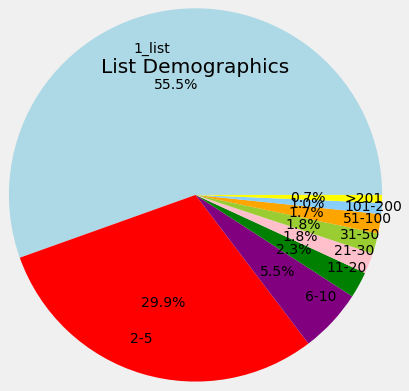

In [14]:
list = ['1_list','2-5','6-10','11-20','21-30','31-50','51-100','101-200','>201']
list_Percentage = List_Demographics["Percentage of listing"]
colors = ["lightblue","red","purple","green","pink","yellowgreen","orange","lightskyblue","yellow"]
plt.pie(list_Percentage, labels=list,colors=colors,autopct="%1.1f%%",radius=2,labeldistance=0.8)
plt.title('List Demographics')
plt.savefig("Output/List Demographics")
plt.show()


In [66]:
# price Demographics
min_p = min(abb_df['Price'])
max_p = max(abb_df['Price'])
mean_p = round(abb_df['Price'].mean(),2)
# print(f'min price:{min_p}, max price:{max_p},mean_p:{mean_p}')
price_dict={"Minimum Price":[min_p], "Maximum Price":[max_p],"Mean Price":[mean_p]}
price_df = pd.DataFrame(price_dict)
price_df                                                                     
                                                                     
                                                                     

,Minimum Price,Maximum Price,Mean Price
0,0,10000,162.05


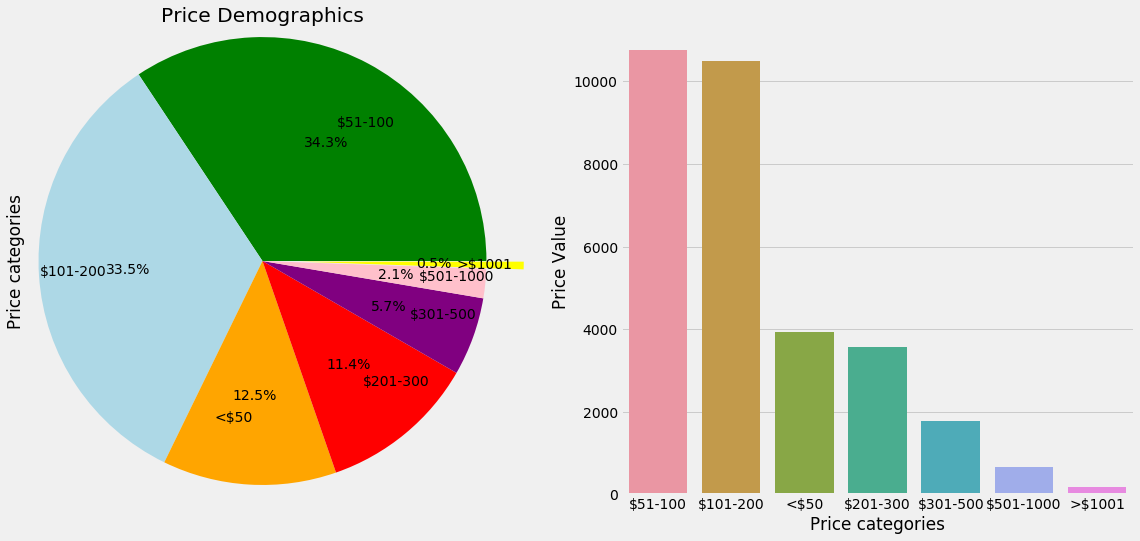

In [98]:
price_bins = [0,50,100,200,300,500,1000, max(abb_df['Price'])]
price_group_names =["<$50","$51-100","$101-200","$201-300","$301-500","$501-1000",">$1001"]
abb_df["Price categories"] = pd.cut(abb_df["Price"], price_bins, labels=price_group_names)

f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ["green","lightblue","orange","red","purple","pink","yellow"]
abb_df['Price categories'].value_counts().plot.pie(explode=[0,0,0,0,0,0,0.2],colors = colors, autopct='%1.1f%%',ax=ax[0],labeldistance=0.7,radius=1.2)
ax[0].set_title('Price Demographics')

sns.countplot('Price categories',data=data,ax=ax[1],order=data['Price categories'].value_counts().index,)
ax[1].set_ylabel('Price Value')
plt.show()

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.pie(Price_Demographics['Price categories'],labels=price_Demographics.index,autopct="%1.1f%%",radius=2)
ax2.plot(Price_Demographics['Price categories'],data=data,ax=ax[1],order=data['Price categories'].value_counts().index))


for ax in fig.get_axes():
    ax.label_outer()

SyntaxError: invalid syntax (<ipython-input-76-9526663a767c>, line 4)

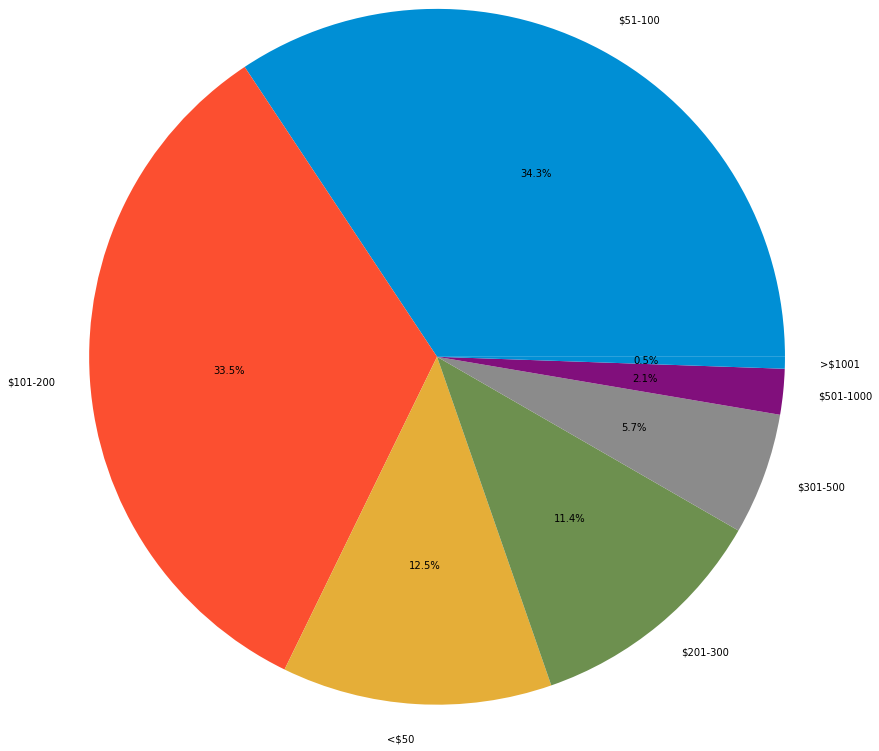

In [48]:
plt.pie(Price_Demographics['Price categories'],labels=price_Demographics.index,autopct="%1.1f%%",radius=4)
plt.show()

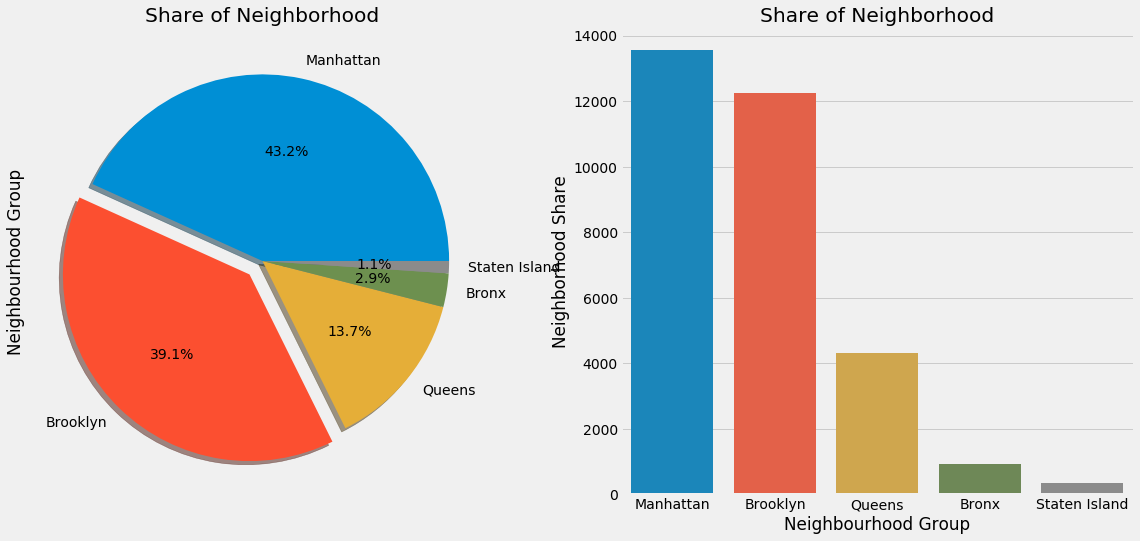

In [78]:
# Airbnb locations
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Neighbourhood Group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')

sns.countplot('Neighbourhood Group',data=data,ax=ax[1],order=data['Neighbourhood Group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
ax[1].set_ylabel('Neighborhood Share')
plt.show()

In [15]:
plt.figure(figsize=(14,10))
sns.scatterplot(abb_df['Longitude'],abb_df['Latitude'],hue =abb_df[ "Neighbourhood Group"],size=abb_df['Price categories'])
plt.show()

KeyError: 'Price categories'

<Figure size 1008x720 with 0 Axes>

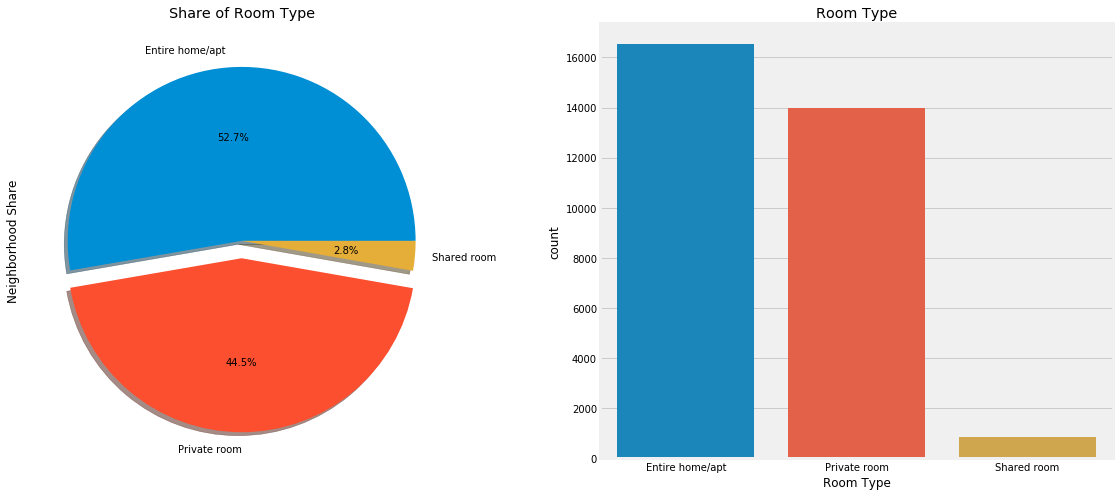

In [17]:
# Room Type
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Room Type'].value_counts().plot.pie(explode=[0,0.1,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('Room Type',data=data,ax=ax[1],order=data['Room Type'].value_counts().index)
ax[1].set_title('Room Type')
plt.show()

In [16]:
area_mean=abb_df.groupby('Neighbourhood Group').count()
area_mean


,ID,Name,Host ID,Host Name,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability,List Categories
Neighbourhood Group,,,,,,,,,,,,,,,,
Bronx,914,913,914,913,914,914,914,914,914,914,914,756,756,914,914,914
Brooklyn,12260,12259,12260,12256,12260,12260,12260,12260,12260,12260,12260,10664,10664,12260,12260,12260
Manhattan,13559,13557,13559,13557,13559,13559,13559,13559,13559,13559,13559,10813,10813,13559,13559,13559
Queens,4298,4298,4298,4297,4298,4298,4298,4298,4298,4298,4298,3635,3635,4298,4298,4298
Staten Island,331,331,331,331,331,331,331,331,331,331,331,287,287,331,331,331


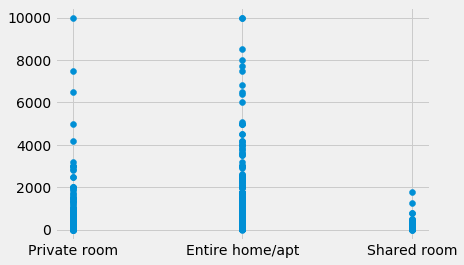

In [17]:
plt.scatter(abb_df['Room Type'], abb_df['Price'])


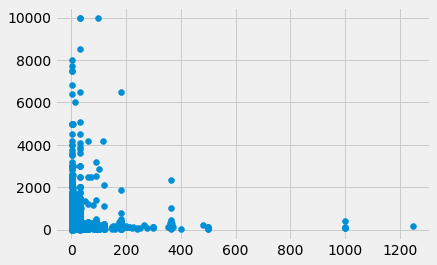

In [20]:
plt.scatter(abb_df['Minimum Nights'], abb_df['Price'])

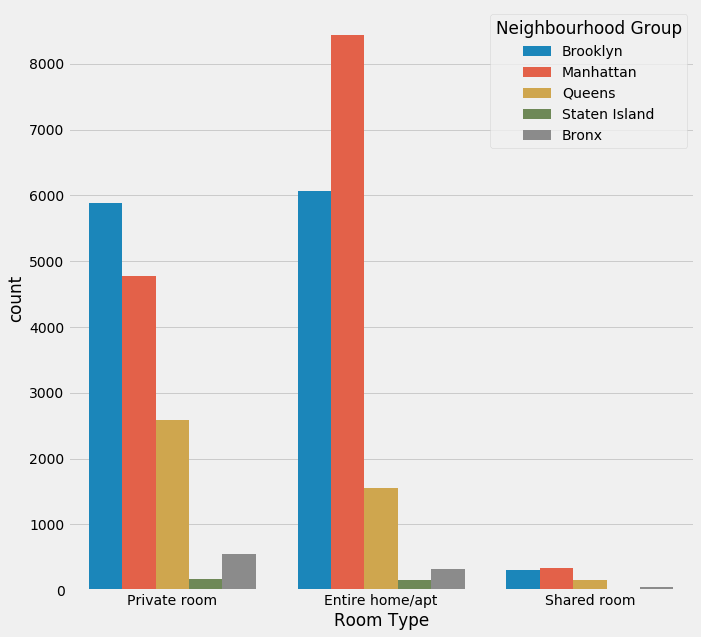

In [19]:
plt.figure(figsize=(10,10))
df1 = sns.countplot(file['Room Type'],hue=file['Neighbourhood Group'])